## **Spam SMS Classification**

####**Context:**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

####**Data Collection:**

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

- A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].

- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].

- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].

- Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

####**Data Sourse:**

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

####**Objective:**

Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

####**Performance Matrics:**
- Accuracy Score
- Confusion Matrics

###**Import Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',usecols=['v1','v2'],encoding='cp1252')

In [ ]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

- Imbalanced dataset.

#####Renaming columns:

In [ ]:
df.rename(columns={'v1':'target','v2':'msg'},inplace=True)

In [ ]:
df.head(2)

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [ ]:
df['target']=df['target'].apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(5169, 2)

###**Exploratory Data Analysis:**

<AxesSubplot:title={'center':'Target Data'}>

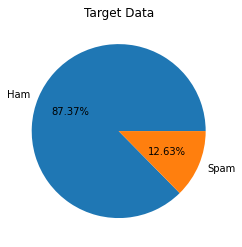

In [ ]:
df['target'].value_counts().plot(kind='pie',labels=['Ham','Spam'],autopct='%.2f%%',ylabel='',title='Target Data')

- Imbalanced is data

**Next**
-  Creating a new feature of total characters in each msgs.
- Breaking on basis of each chars.

In [ ]:
df['msg_chars']=df['msg'].apply(len)

- Creating a new feature of total words in a msg
- First converting string into list by splitting, and then counting the len of list which give the len of words
- Breaking on basis of each words

In [ ]:
# method 2
print(df['msg'].str.split().apply(len).head())

#method 2 : use this code, give better result then above
print(df['msg'].apply(lambda x : len(nltk.word_tokenize(x))).head())

0    20
1     6
2    28
3    11
4    13
Name: msg, dtype: int64
0    23
1     8
2    37
3    13
4    15
Name: msg, dtype: int64


- Split function dividing in less words then nltk func
- so, we will use nltk

In [ ]:
df['msg_words']=df['msg'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
# creating new feature for no of sentence in msg
df['msg_sentences']=df['msg'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,msg,msg_chars,msg_words,msg_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,target,msg_chars,msg_words,msg_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


####Spam Basic Statistics:

In [ ]:

df[df['target']==1].describe().style.background_gradient()

,target,msg_chars,msg_words,msg_sentences
count,653.000000,653.000000,653.000000,653.000000
mean,1.000000,137.891271,27.474732,2.969372
std,0.000000,30.137753,6.893007,1.488910
min,1.000000,13.000000,2.000000,1.000000
25%,1.000000,132.000000,25.000000,2.000000
50%,1.000000,149.000000,29.000000,3.000000
75%,1.000000,157.000000,32.000000,4.000000
max,1.000000,224.000000,44.000000,9.000000


####Ham Basic Statistics:

In [ ]:
# Ham
df[df['target']==0].describe().style.background_gradient(cmap='YlOrRd')  

,target,msg_chars,msg_words,msg_sentences
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.000000,70.459256,16.957484,1.815545
std,0.000000,56.358207,13.394052,1.364098
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,34.000000,8.000000,1.000000
50%,0.000000,52.000000,13.000000,1.000000
75%,0.000000,90.000000,22.000000,2.000000
max,0.000000,910.000000,219.000000,38.000000


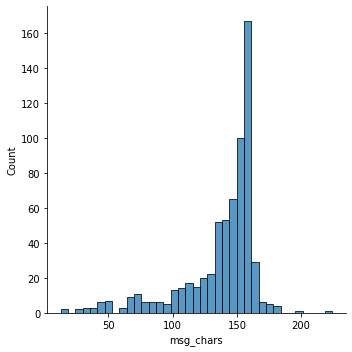

In [ ]:
sns.displot(df[df['target']==1]['msg_chars'],label='Spam')

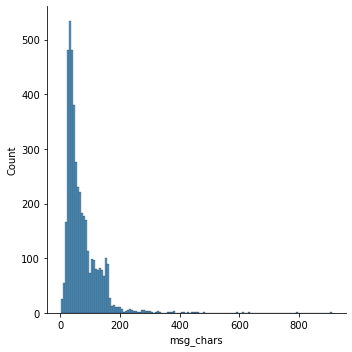

In [ ]:
sns.displot(df[df['target']==0]['msg_chars'],label='Ham')

#####**PDF of Spam and Ham:**

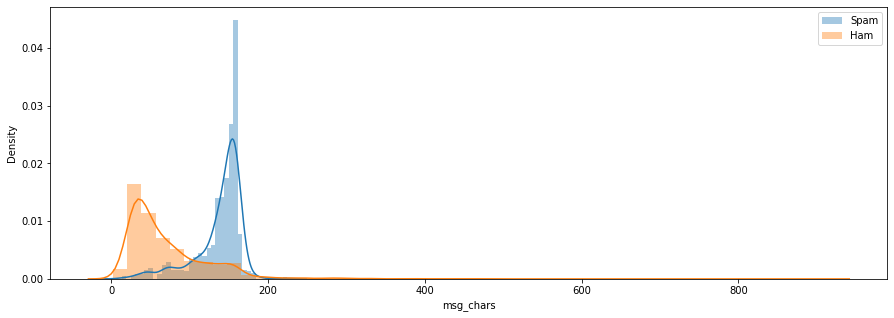

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['target']==1]['msg_chars'],label='Spam')
sns.distplot(df[df['target']==0]['msg_chars'],label='Ham')
plt.legend()

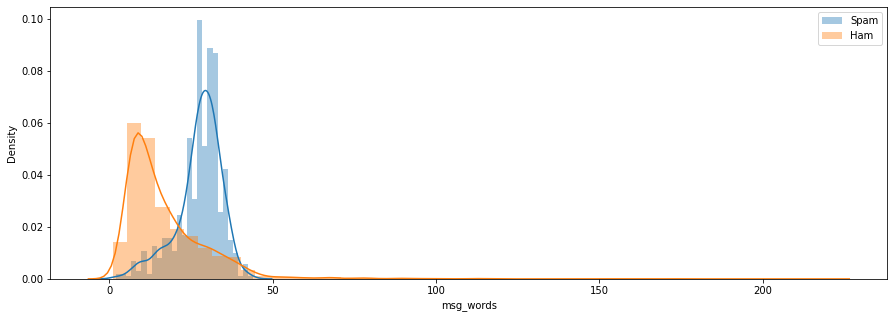

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['target']==1]['msg_words'],label='Spam')
sns.distplot(df[df['target']==0]['msg_words'],label='Ham')
plt.legend()

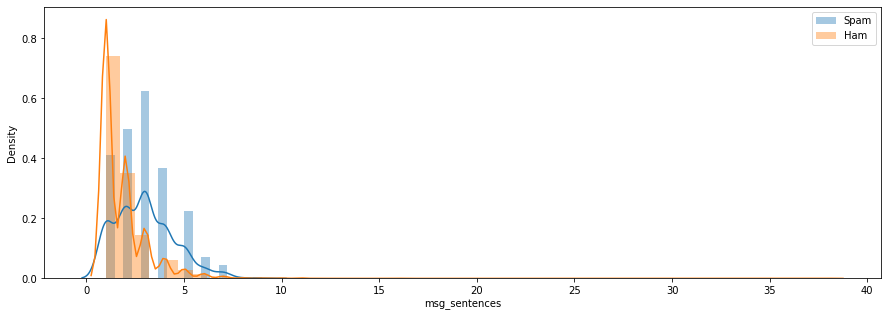

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['target']==1]['msg_sentences'],label='Spam')
sns.distplot(df[df['target']==0]['msg_sentences'],label='Ham')
plt.legend()

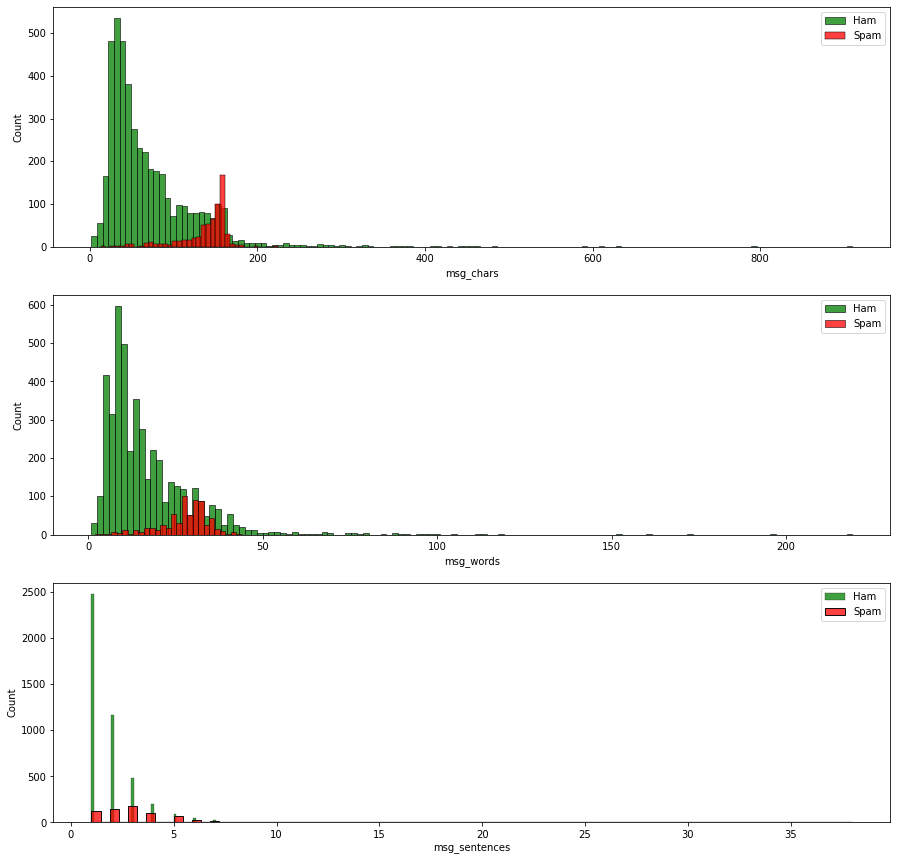

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(311)
sns.histplot(df[df['target']==0]['msg_chars'],color='g',label='Ham')
sns.histplot(df[df['target']==1]['msg_chars'],color='r',label='Spam')
plt.legend()

plt.subplot(312)
sns.histplot(df[df['target']==0]['msg_words'],color='g',label='Ham')
sns.histplot(df[df['target']==1]['msg_words'],color='r',label='Spam')
plt.legend()

plt.subplot(313)
sns.histplot(df[df['target']==0]['msg_sentences'],color='g',label='Ham')
sns.histplot(df[df['target']==1]['msg_sentences'],color='r',label='Spam')
plt.legend()

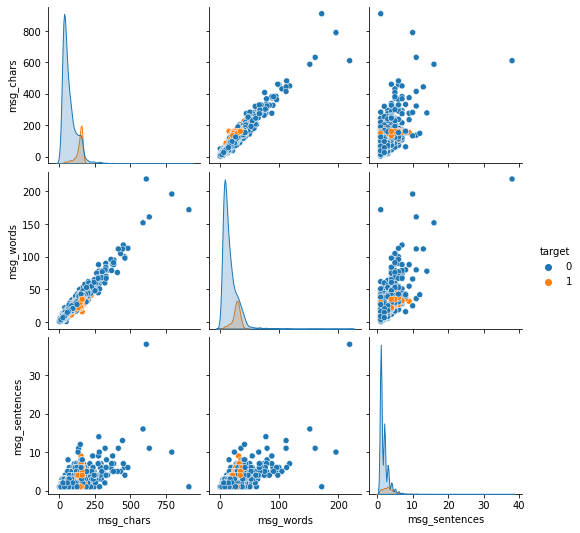

In [ ]:
sns.pairplot(df,hue='target')

####**Pearson coeff. correlation:**

<AxesSubplot:>

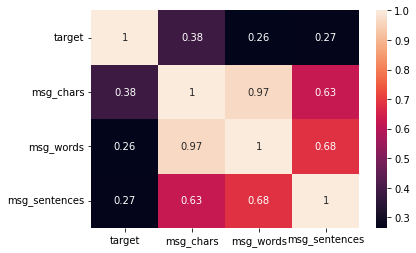

In [ ]:
sns.heatmap(df.corr(),annot=True)

- As no of chars increases changes of being spam also increases
- Here we can see there is high correlation between no of chars,words and sentences.
- So, while model building we cannot keep all three features, because of multicolinearity,okly keep one 
- We will keep msg_chars because it has high correlation with target feature then others

### **Data/Text Preprocessing:**

- **Lower case**
- **Tokenization**
- Removing **special characters**
- Removing **stop words**
- **Stemming** 

In [ ]:
def text_prep(text):
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    # lower case converting
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special chars
    ls = []
    for i in text:
       if i.isalnum():
            ls.append(i)
    ls2 = []
    # remove stopwords
    for i in ls:
        if i not in stopwords.words('english'):
            ls2.append(i) 

    ls3 = []
    # apply stemming
    for i in ls2:
        ls3.append(ps.stem(i))
    
    return " ".join(ls3)

In [ ]:
df['trans_msg']=df['msg'].apply(text_prep)

#### **Word Cloud:**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1200,height=500,min_font_size=10,background_color='white')

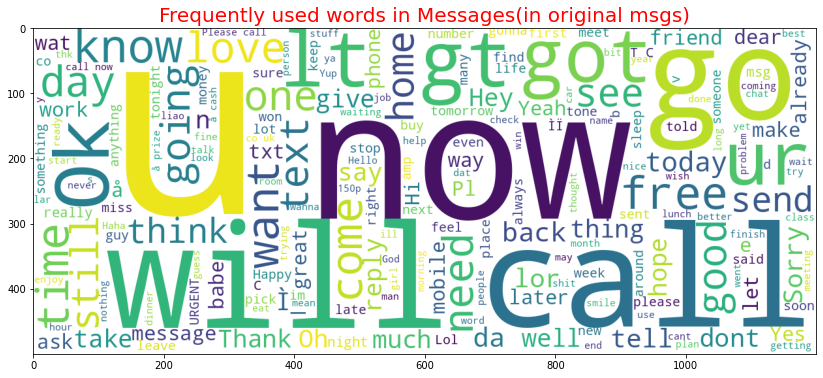

In [ ]:
spam_wc = wc.generate(df['msg'].str.cat(sep=' ')) # object of words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Messages(in original msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

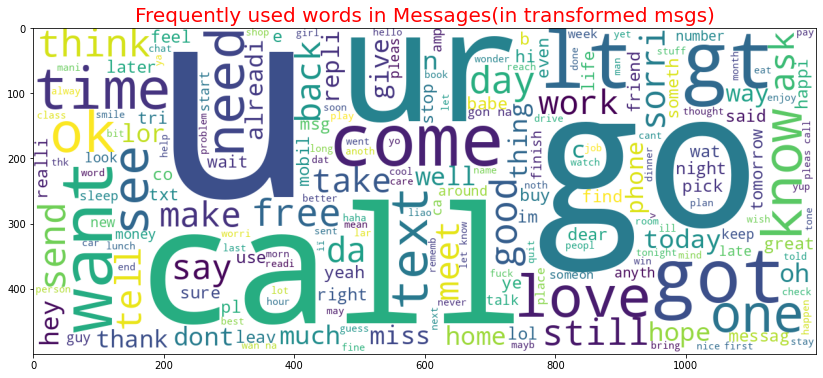

In [ ]:
spam_wc = wc.generate(df['trans_msg'].str.cat(sep=' ')) # object of words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Messages(in transformed msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

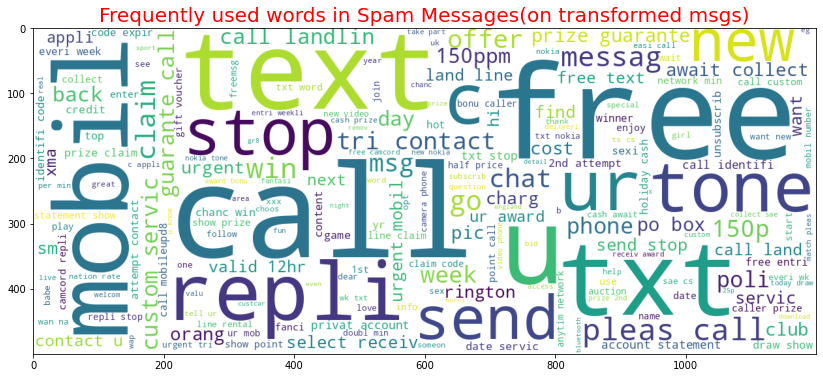

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['trans_msg'].str.cat(sep=' ')) # object of words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Spam Messages(on transformed msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

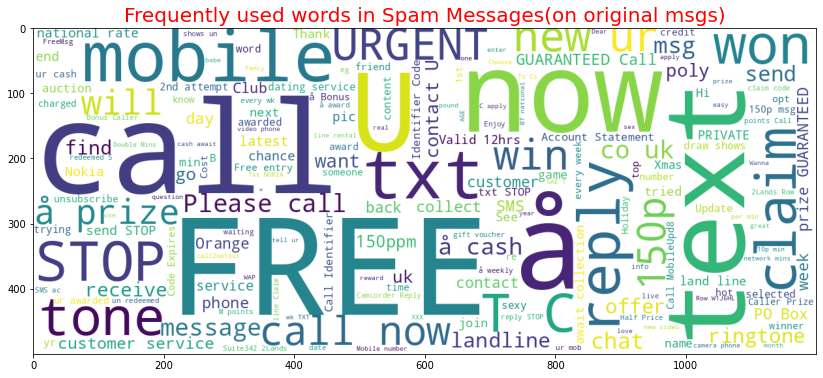

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['msg'].str.cat(sep=' ')) # object of words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Spam Messages(on original msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

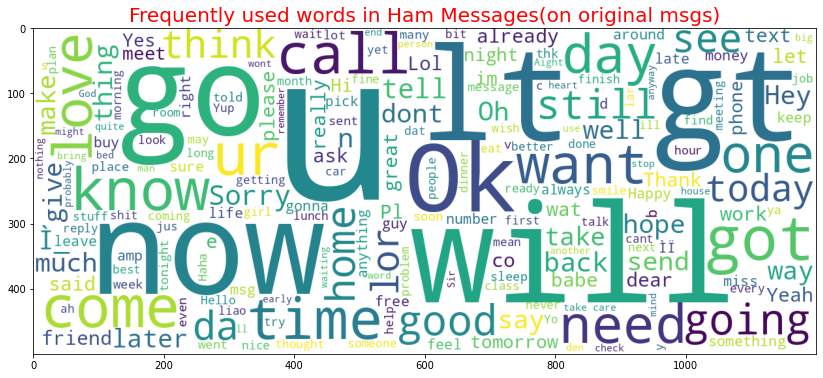

In [ ]:
spam_wc = wc.generate(df[df['target']==0]['msg'].str.cat(sep=' ')) # object of words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Ham Messages(on original msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

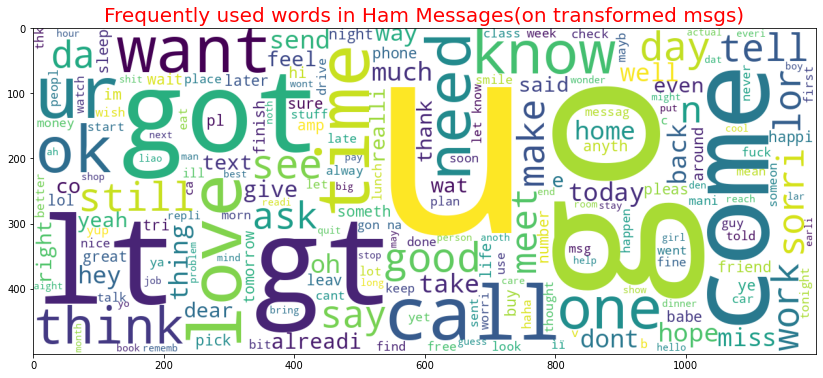

In [ ]:
spam_wc = wc.generate(df[df['target']==0]['trans_msg'].str.cat(sep=' ')) # object of words
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Frequently used words in Ham Messages(on transformed msgs)',fontdict={'fontsize':20},loc='center',color='r')
plt.show()

In [ ]:
from collections import Counter

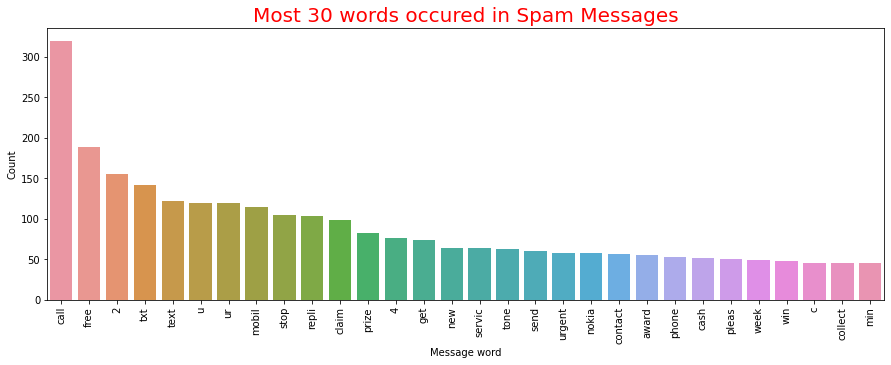

In [ ]:
spam_corpus =[] # list of all words
for i in (df[df['target']==1]['trans_msg'].tolist()):
    for word in i.split():
        spam_corpus.append(word)

# len(spam_corpus) # entire spam msgs words converted in to list

spam30 = pd.DataFrame(Counter(spam_corpus).most_common(30)) #most common 30 words in entire spam msgs only

plt.figure(figsize=(15,5))
sns.barplot(spam30[0],spam30[1])
plt.xticks(rotation=90)
plt.title('Most 30 words occured in Spam Messages',fontdict={'fontsize':20},loc='center',color='r')
plt.ylabel('Count')
plt.xlabel('Message word')
plt.show()


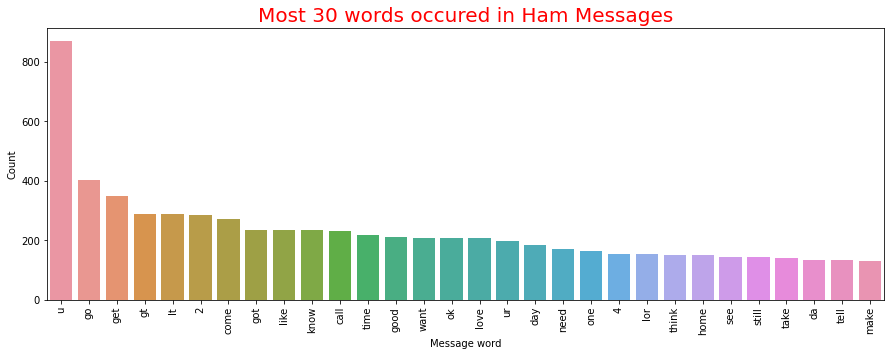

In [ ]:
ham_corpus =[]
for i in (df[df['target']==0]['trans_msg'].tolist()):
    for word in i.split():
        ham_corpus.append(word)

# len(spam_corpus) # entire spam msgs words converted in to list

ham30 = pd.DataFrame(Counter(ham_corpus).most_common(30)) #most common 30 words in entire spam msgs only

plt.figure(figsize=(15,5))
sns.barplot(ham30[0],ham30[1])
plt.xticks(rotation=90)
plt.title('Most 30 words occured in Ham Messages',fontdict={'fontsize':20},loc='center',color='r')
plt.ylabel('Count')
plt.xlabel('Message word')
plt.show()


### **Model Building**
- Will try different model, start from Naive Bays
- Naive bays perform well on textual data

#### **ML model works on numerical data:**
- So first, convert text data to numerical or convert text to vectors
- Will vectorization to convert text to num

#### **Bag of Words vectorizer:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['trans_msg']).toarray()

In [ ]:
X.shape

(5169, 6629)

In [ ]:
y = df['target'].values
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [ ]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [ ]:
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(precision_score(y_test,gb_pred))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [ ]:
mb.fit(X_train,y_train)
mb_pred = mb.predict(X_test)
accuracy_score(y_test,mb_pred)
print(accuracy_score(y_test,mb_pred))
print(confusion_matrix(y_test,mb_pred))
print(precision_score(y_test,mb_pred))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [ ]:
bb.fit(X_train,y_train)
bb_pred = bb.predict(X_test)
accuracy_score(y_test,bb_pred)
print(accuracy_score(y_test,bb_pred))
print(confusion_matrix(y_test,bb_pred))
print(precision_score(y_test,bb_pred))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


#### **Conclusion:** 
- Till here we got best result **97% accuracy** and **97% precision score** on **BernoulliNB**
- Model predicting ham messages to spam message, this what we don't want.

#### **TF-IDF Vectorizor:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['trans_msg']).toarray()
y = df['target'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [ ]:
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(precision_score(y_test,gb_pred))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [ ]:
mb.fit(X_train,y_train)
mb_pred = mb.predict(X_test)
accuracy_score(y_test,mb_pred)
print(accuracy_score(y_test,mb_pred))
print(confusion_matrix(y_test,mb_pred))
print(precision_score(y_test,mb_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bb.fit(X_train,y_train)
bb_pred = bb.predict(X_test)
accuracy_score(y_test,bb_pred)
print(accuracy_score(y_test,bb_pred))
print(confusion_matrix(y_test,bb_pred))
print(precision_score(y_test,bb_pred))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


#####**Here we got 95.9% accuracy and 100% precision score on MultinomialNB**
- So we have achieved 100% precision score, that's we want
- Although BernoulliNB giving 97% accuracy, but precision score also 97%, which means this can predict ham message as spam.
- So, accuracy not much important